# Question 2 - Multiple Linear Regression
## Suryakumar P 21MIS1146
### abc.csv  is the advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. Apply appropriate ML algorithm to predict the sales.

## 2.Write the justification of the selection of model. 
### The given problem can be approached via "Multiple Linear Regression", because here we are going to 'predict' the sales revenue based on multiple dependency variables 'TV', 'Radio', 'Newspaper'.

# Importing Dataset

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("abc.csv")

In [5]:
df.head(10)

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Relationship between the features and response

In [7]:
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt

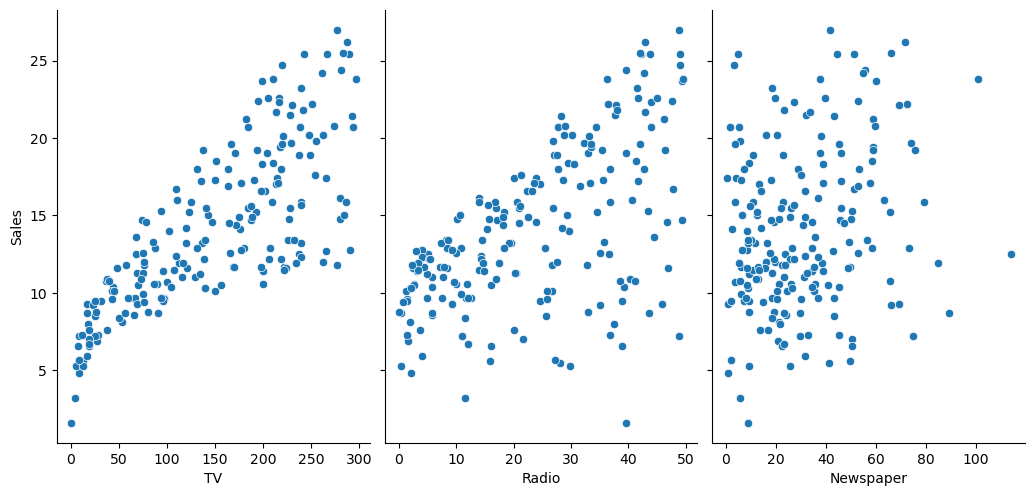

In [10]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=0.7)

# Applying Multiple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
x=df.drop(['ID','Sales'],axis=1)
y=df['Sales']
lm1=LinearRegression()
lm1.fit(x,y)
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
list(zip(['TV','Radio','Newspaper'],lm1.coef_))

[('TV', 0.04576464545539761),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.00103749304247632)]

### Heatmap Visualisation

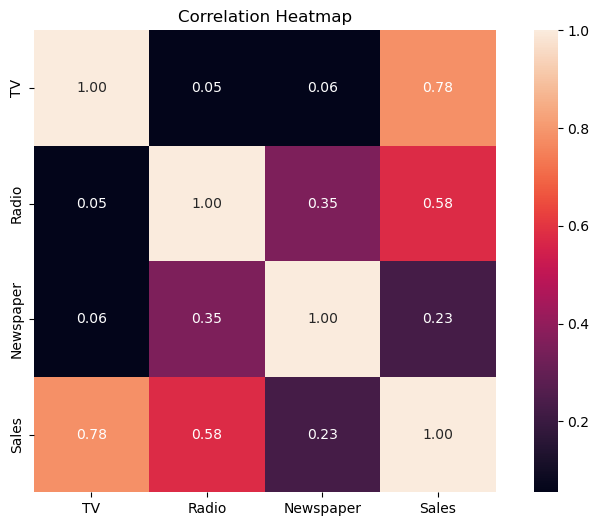

In [22]:
df_no_id = df.drop('ID', axis=1)
correlation_matrix = df_no_id.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

In [24]:
from sklearn.metrics import r2_score
lm2=LinearRegression()
lm2.fit(x[['TV','Radio']],y)
lm2_pred=lm2.predict(x[['TV','Radio']])
print(r2_score(y,lm2_pred))

0.8971942610828957


In [26]:
lm3=LinearRegression()
lm3.fit(x[['TV','Radio','Newspaper']],y)
lm3_pred=lm3.predict(x[['TV','Radio','Newspaper']])
print(r2_score(y,lm3_pred))

0.8972106381789522


## Model Evaluation Using Train/Test Split and Metrics

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=df.drop('Sales',axis=1)
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm4=LinearRegression().fit(x_train,y_train)
lm4_pred=lm4.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R*2:",r2_score(y_test,lm4_pred))

RMSE: 1.4038934642343053
R*2: 0.9157123993052203


In [29]:
X=df.drop(['Sales','Newspaper'],axis=1)
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm5=LinearRegression().fit(x_train,y_train)
lm5_pred=lm5.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R*2:",r2_score(y_test,lm5_pred))

RMSE: 1.3887762937278108
R*2: 0.9175178493677969


In [32]:
!pip install yellowbrick --quiet

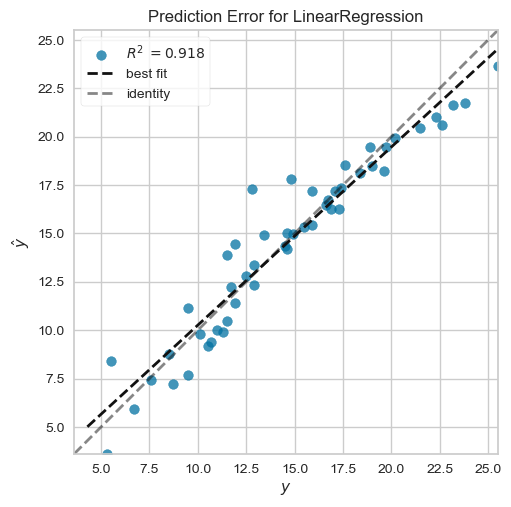

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm5).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

In [ ]:
'''Co-efficients of Dependent Variables:

TV: 0.04576464545539761
Radio: 0.18853001691820456
Newspaper: -0.00103749304247632

Intercept Value: 2.9388893694594085

Model Evaluation
R^2: 0.9157123993052203 Train Split
R^2: 0.9175178493677969 Test Split
Since the Accuracy is around 91% the model is slightly over-fit'''